<div id="container" style="position:relative;">
<div style="float:left"><h1>Data Preparation & EDA</h1></div>
</div>
</div>


### Dataset

We will be using a real world bank marketing dataset. The dataset contains information about customers who were contacted as part of a telephone marketing campaign trying to get customers to sign up for a term deposit product. The dataset also contains information about whether the customer has been contacted as part of the current marketing campaign or had been as part of a previous campaign. 

#### Data Dictionary

To help us with our analysis, take some time to study the data dictionary below. 

Demographic & client data:
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education (categorical)
- credit_in_default: has credit in default? (categorical)
- housing_loan: has housing loan? (categorical)
- personal_loan: has personal loan? (categorical)

Data about the calls from *this* campaign:
- last_contact_type: contact communication type (categorical)
- last_contact_month: last contact month of year (categorical)
- last_contact_day: last contact day of the week (categorical)
- last_contact_duration: last contact duration, in seconds (numeric)
- last_contact_duration_mins: last contact duration, in minutes (numeric)
- n_contacts_this_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Data about calls from *previous* campaigns:
- n_contacts_prev_campaign: number of contacts performed before this campaign and for this client (numeric)
- prev_campaign_outcome: outcome of the previous marketing campaign (categorical)

Field of interest:
- registered: has the client registered for a term deposit?

### Question of interest

Imagine we work as a data analyst/scientist within the marketing department of the bank which owns this data. Our manger asks us to investigate the following: 

> How do customers who registered for the term deposit product differ from those who did not? This can be in terms of customer demographics or in terms of features of the current and prior marketing campaign. 


#### Plan of Attack:
1. Initial data cleaning (looking for missing data, duplicate data, other anomalies)
2. Data preprocessing (is everything in the right format?)
3. Exploratory analysis (looking at the variables)
4. Draw insights 
5. Formulate a conclusion / recommendation

### Data Cleaning

The bank has provided us with this snapshot of demographic and campaign data related to the term deposit product. First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [1]:
# Holy trinity of datascience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's read in the data
bank_df = pd.read_csv('data/bank-marketing-data.csv')

Having read in the data, let's take a look:

In [3]:
# Check
bank_df.head()

,;age;job;marital;education;credit_in_default;housing_loan;personal_loan;last_contact_type;last_contact_month;last_contact_day;last_contact_duration;n_contacts_this_campaign;days_since_last_contact;n_contacts_prev_campaign;prev_campaign_outcome;registered
0,0;38.0;student - Albufeira;divorced;unknown;no...
1,1;34.0;services - Mealhada;married;professiona...
2,2;43.0;housemaid - Vila Franca de Xira;;;unkno...
3,3;75.0;retired - Mirandela;married;basic.4y;no...
4,4;58.0;retired - Funchal;married;unknown;no;un...


As we can see, the data were not read in correctly, as the file provided was semi-colon delimited. Therefore, we will re-read in the dataset given this.

In [4]:
# Re-read in the data this time using the semicolon as a delimiter
bank_df = pd.read_csv('data/bank-marketing-data.csv', sep=';')

In [5]:
# Check again
bank_df.head()

,Unnamed: 0,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


There is also an extra column, "Unnamed: 0",  the first column, which appears to be a key or index of some kind. Therefore, we will read the data with this column as the index for our dataframe.

In [6]:
# Read it again
bank_df = pd.read_csv('data/bank-marketing-data.csv', sep=';', index_col=0)

# Check
bank_df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [7]:
# How much data are we working with here?
print(bank_df.shape)

(11720, 16)


In [8]:
print(f'Our dataframe has {bank_df.shape[0]} rows and {bank_df.shape[1]} columns.')

Our dataframe has 11720 rows and 16 columns.


We have 11,720 rows of 16 different variables that were provided. However, possibly some concern as there does not appear to be a unique customer identifier, nor is it clear that the index column that was read in is a unique identifier on the row-level. We will proceed with caution, and check for duplicates in the data and so on.

Next steps:
- Check datatypes and formats
- Check for duplicate data (is the data unique on the row-level? What is the row-level?)
- Check for missing data

#### Step 1: Check datatypes and formats

First we will investigate the structure and format of the data to make sure that nothing is amiss.

In [9]:
bank_df.head(3)

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no


We see a variety of numerical (int/float) and non-numeric columns. Furthermore:

In [10]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

We see there are a mixture of numeric and non-numeric columns. Many "object" type which corresponds to string / categorical data. We can also see that there may be some binary type columns which could be True/False or 0/1 which are captured as "yes"/"no". Finally, we see that there are some columns missing data (<11,720 non-null values) *e.g.* `last_contact_duration` appears to be missing a large proportion of data.

Something appears to be amiss with the `job` column as well, it looks like the job and location information appear together.

In [11]:
# job column - Fixed, removed the .values to render the job column as a series
bank_df['job']

0                          student - Albufeira
1                          services - Mealhada
2              housemaid - Vila Franca de Xira
3                          retired - Mirandela
4                            retired - Funchal
                         ...                  
11715                       services - Funchal
11716                      blue-collar - Moura
11717                      housemaid - Valongo
11718    technician - Vila Nova de Santo André
11719                    blue-collar - Tondela
Name: job, Length: 11720, dtype: object

#### Fixing the `job` column

So it appears the customer job and location have been concatenated together into one column and separated by a "-" (that is my assumption / hypothesis).

In [12]:
# splitting a single string
"student - region".split(" - ")

['student', 'region']

I almost wrote a for loop, but instead we will use the [pandas string accessor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to apply this in a vectorized way.

In [13]:
# Apply split using an accessor
bank_df['job'].str.split(" - ", expand=True)

,0,1
0,student,Albufeira
1,services,Mealhada
2,housemaid,Vila Franca de Xira
3,retired,Mirandela
4,retired,Funchal
...,...,...
11715,services,Funchal
11716,blue-collar,Moura
11717,housemaid,Valongo
11718,technician,Vila Nova de Santo André


In [14]:
# Let's pull out the above and "bolt it" back into our original dataframe
# Make a new dataframe with the two columns
cols_df = bank_df['job'].str.split(" - ", expand=True)

# Set the job column to be 0 and add a new column to be 1 which will be the location
bank_df['job'] = cols_df[0]

# Add new column for location - could also use df.insert
bank_df['location'] = cols_df[1]

In [15]:
# Check
bank_df.head(10)

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,Mealhada
2,43.0,housemaid,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,Funchal
5,30.0,admin.,single,university.degree,no,no,no,cellular,may,wed,82.0,2,999,1,failure,no,Ponte de Sor
6,29.0,services,single,high.school,no,yes,no,cellular,nov,wed,178.0,1,999,1,failure,no,Queluz
7,32.0,admin.,divorced,basic.9y,no,yes,no,cellular,jul,mon,118.0,3,999,0,nonexistent,no,Esmoriz
8,32.0,blue-collar,NaN,university.degree,unknown,yes,no,cellular,nov,tue,63.0,1,999,0,nonexistent,no,Chaves
9,24.0,technician,NaN,professional.course,unknown,no,no,telephone,may,mon,149.0,4,999,0,nonexistent,no,Agualva-Cacém


We have now cleaned the `job` as well as extracting new information about location. Let's move forward and look at further cleaning that may be required.

#### Checking for duplicate data
Now that the data appears sufficiently clean, we will check for duplicate data. First, on the row level.

In [16]:
# Checking for duplicates and counting
bank_df.duplicated().sum()

51

There are apparently 51 duplicate rows in the dataset. What does this represent as a percentage?

In [17]:
bank_df.duplicated().sum()/bank_df.shape[0]*100.0

0.4351535836177475

Approximately 0.4% of the dataset is duplicate on the row-level. Let us investigate further using the index returned.

In [18]:
bank_df[bank_df.duplicated(keep=False)].head(100)

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
39,32.0,technician,single,professional.course,no,yes,no,cellular,apr,mon,54.0,1,999,0,nonexistent,no,Agualva-Cacém
91,39.0,services,divorced,high.school,unknown,yes,no,telephone,jun,mon,241.0,5,999,0,nonexistent,no,Funchal
148,53.0,unknown,married,high.school,unknown,no,no,telephone,jun,wed,NaN,3,999,0,nonexistent,no,Santana
171,24.0,services,single,high.school,no,no,no,telephone,may,wed,260.0,1,999,0,nonexistent,no,Torres Vedras
438,36.0,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,300.0,2,999,0,nonexistent,no,Ermesinde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,32.0,technician,single,professional.course,no,yes,no,cellular,apr,mon,54.0,1,999,0,nonexistent,no,Agualva-Cacém
11714,47.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,thu,563.0,1,999,0,nonexistent,no,Câmara de Lobos
11715,39.0,services,divorced,high.school,unknown,yes,no,telephone,jun,mon,241.0,5,999,0,nonexistent,no,Funchal
11716,44.0,blue-collar,NaN,basic.4y,no,yes,no,cellular,aug,tue,NaN,3,999,0,nonexistent,no,Moura


Because there is no unique identifier, it is possible that the duplicate rows do describe different customers with the same attributes. However, given that the amount of duplicates is small and we do not have a way to further confirm this with the data / business team, we will assume that this is unlikely, and that these rows are in fact duplicate and so we will discard.

In [19]:
# drop the duplicates and save the result to a new variable
bank_df2 = bank_df.drop_duplicates()
bank_df2.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,Mealhada
2,43.0,housemaid,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,Funchal


In [20]:
# Sanity check
bank_df2.duplicated().sum()

0

Now we have removed all the duplicated rows from the original dataframe. Let us also be thorough and check that no two columns also contain the same information. To do this, we will take the original dataframe's transpose, and check for duplicates on its rows level

In [21]:
bank_df2.T.duplicated()

age                         False
job                         False
marital                     False
education                   False
credit_in_default           False
housing_loan                False
personal_loan               False
last_contact_type           False
last_contact_month          False
last_contact_day            False
last_contact_duration       False
n_contacts_this_campaign    False
days_since_last_contact     False
n_contacts_prev_campaign    False
prev_campaign_outcome       False
registered                  False
location                    False
dtype: bool

Looking at the above, since all the result are False so we are confident that none of the columns in the provided data are duplicate / contain the exact same information even though they have different column names.

We can also explore duplicate information using correlations, and check the data content to make sure there isn't duplicated information that isn't an exact copy. When we employ a heatmap on the correlations, we expect to see perfect correlation only on the diagonals.

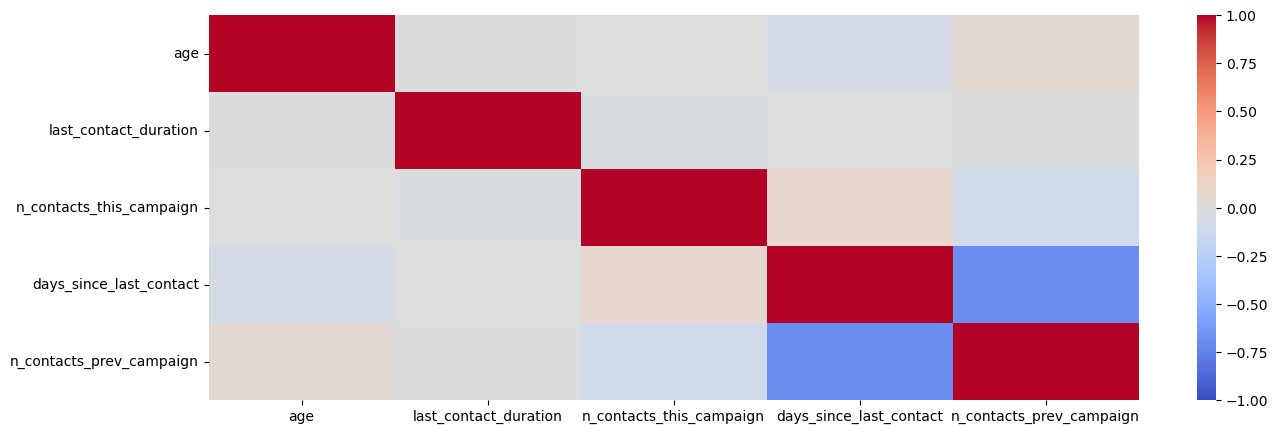

In [22]:
plt.figure(figsize=(15, 5))
sns.heatmap(bank_df2.corr(numeric_only=True), cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

#### Dealing with missing data

Now we will deal with missing data in the dataset.

In [23]:
# How many values are actually missing?
bank_df2.isna().sum()

age                          582
job                          689
marital                      720
education                    711
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2865
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     689
dtype: int64

In [24]:
# Percentage of missing values in each column
bank_df2.isna().sum()/bank_df2.shape[0]*100.0

age                          4.987574
job                          5.904533
marital                      6.170195
education                    6.093067
credit_in_default            0.000000
housing_loan                 0.000000
personal_loan                0.000000
last_contact_type            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_duration       24.552232
n_contacts_this_campaign     0.000000
days_since_last_contact      0.000000
n_contacts_prev_campaign     0.000000
prev_campaign_outcome        0.000000
registered                   0.000000
location                     5.904533
dtype: float64

Based on the above, it appears ~5% of values are missing for the `age`, `job`, and `location` columns. Whereas the `last_contact_duration` column has much more data missing ~25%.

#### Age

We see there is about 5% missing in the age column. This is valuable information, the percentage of data missing is small, but large enough that we would not drop those entire rows. Therefore, we choose to impute values for the age column. For this, we would like to better understand the distribution of this column:

In [25]:
print("Median age:", bank_df2['age'].median())

Median age: 38.0


In [26]:
print("Mean age:", bank_df2['age'].mean())

Mean age: 40.37963380535763


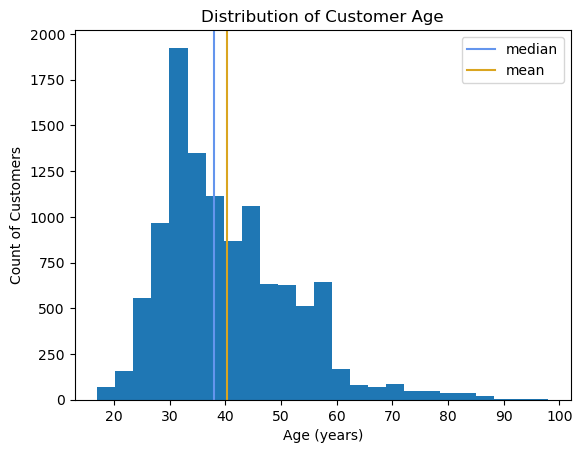

In [27]:
# Let's do a little EDA and visualize the age column to inform our decision
plt.figure()
plt.hist(bank_df2['age'], bins=25)
plt.xlabel('Age (years)')
plt.ylabel('Count of Customers')
plt.title('Distribution of Customer Age')
plt.axvline(bank_df2['age'].median(), label='median', color='cornflowerblue')
plt.axvline(bank_df2['age'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

It appears that the majority of customers are around 30 years of age. The distribution is skewed, so mean and median actually do not appear to be appropriate ways to impute. Therefore, we will impute with the most frequent bin, around 30 years.

In [28]:
#bank_df2['age'] = bank_df2['age'].fillna(30.0)
bank_df2.loc[bank_df2['age'].isnull(), 'age'] = 30.0

In [29]:
# Check 
bank_df2['age'].isna().sum()

0

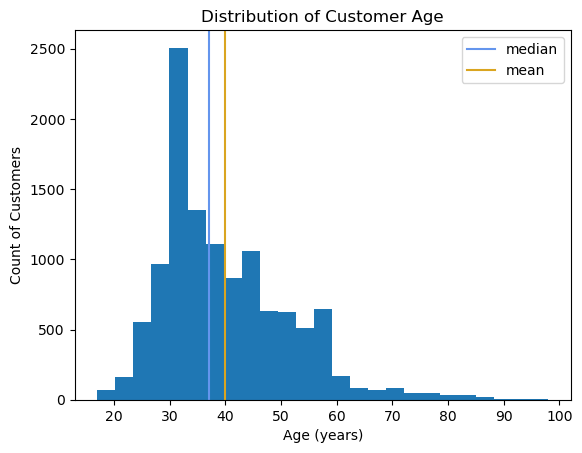

In [30]:
# Let's do a little EDA and visualize the age column to inform our decision
plt.figure()
plt.hist(bank_df2['age'], bins=25)
plt.xlabel('Age (years)')
plt.ylabel('Count of Customers')
plt.title('Distribution of Customer Age')
plt.axvline(bank_df2['age'].median(), label='median', color='cornflowerblue')
plt.axvline(bank_df2['age'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

What is still missing?

In [31]:
bank_df2.isna().sum()

age                            0
job                          689
marital                      720
education                    711
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2865
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     689
dtype: int64

#### Last_contact_duration

Last contact duration is also a numeric field, let's look at imputation here.

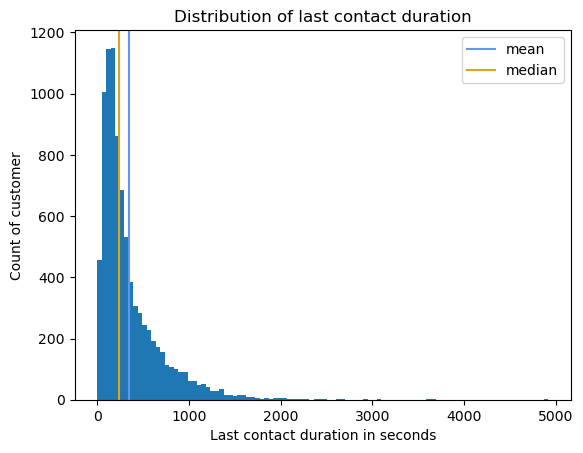

In [32]:
plt.figure()
plt.hist(bank_df2['last_contact_duration'], bins=100)
plt.axvline(bank_df2['last_contact_duration'].mean(), label='mean', color='cornflowerblue')
plt.axvline(bank_df2['last_contact_duration'].median(), label='median', color='goldenrod')
plt.xlabel('Last contact duration in seconds')
plt.ylabel('Count of customer')
plt.title('Distribution of last contact duration')
plt.legend()
plt.show()

We can again see that there is a skew to this distribution, most customers do not talk for long. Using the mean seems like it would introduce bias, the median appear closer to the "peak" of the distribution, therefore we opt to impute using the median.

In [33]:
#bank_df2.loc[:,'last_contact_duration'] = \
#    bank_df2['last_contact_duration'].fillna(bank_df2['last_contact_duration'].median())

bank_df2.loc[bank_df2['last_contact_duration'].isnull(), 'last_contact_duration'] = \
    bank_df2['last_contact_duration'].median()


In [34]:
# Check the result
bank_df2['last_contact_duration'].isna().sum()

0

#### Job column - categorical

Here now, we have a categorical column. What should our imputation strategy be?

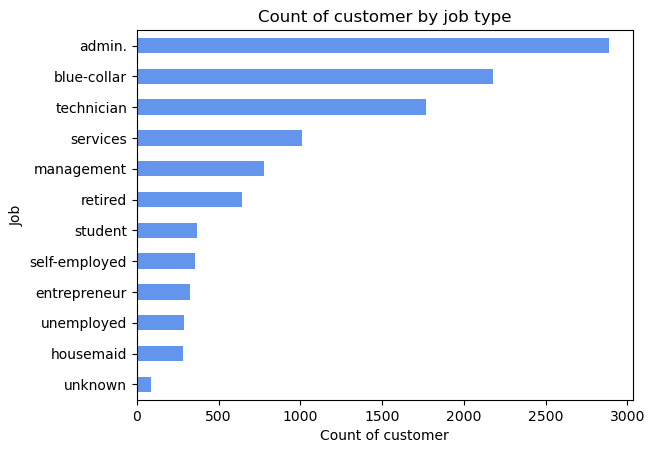

In [35]:
# One-line pandas plotting
bank_df2['job'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of customer')
plt.ylabel('Job')
plt.title('Count of customer by job type')
plt.show()

Looking at the above, we have insights about the customer base. The vast majority appear to be administrative roles or "blue-collar". So perhaps an optimal imputation strategy would just be to pick the mode, and impute all missing jobs as "admin". But in this case there is already an "unknown" so we will just change all the NAs to be "unknown".

In [36]:
# Fill job NAs
# bank_df2['job'] = bank_df2['job'].fillna('unknown')
bank_df2.loc[bank_df2['job'].isnull(), 'job'] = 'unknown'

In [37]:
# Check
bank_df2['job'].isna().sum()

0

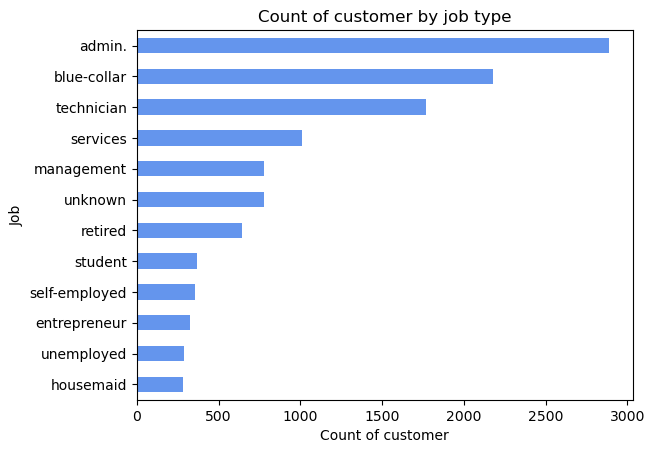

In [38]:
# One-line pandas plotting
bank_df2['job'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of customer')
plt.ylabel('Job')
plt.title('Count of customer by job type')
plt.show()

In [39]:
# What's left?
bank_df2.isna().sum()

age                           0
job                           0
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
location                    689
dtype: int64

#### Location column
This is also a categorical column. We would expect to impute with the mode if appropriate. However, let us again examine the distinct values in this column.

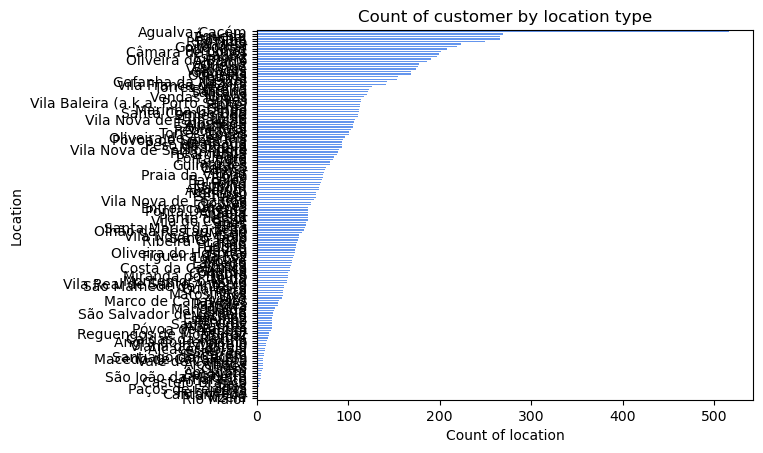

In [40]:
# One-line pandas plotting
bank_df2['location'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of location')
plt.ylabel('Location')
plt.title('Count of customer by location type')
plt.show()

There are a lot of distinct locations! Let's make this figure bigger.

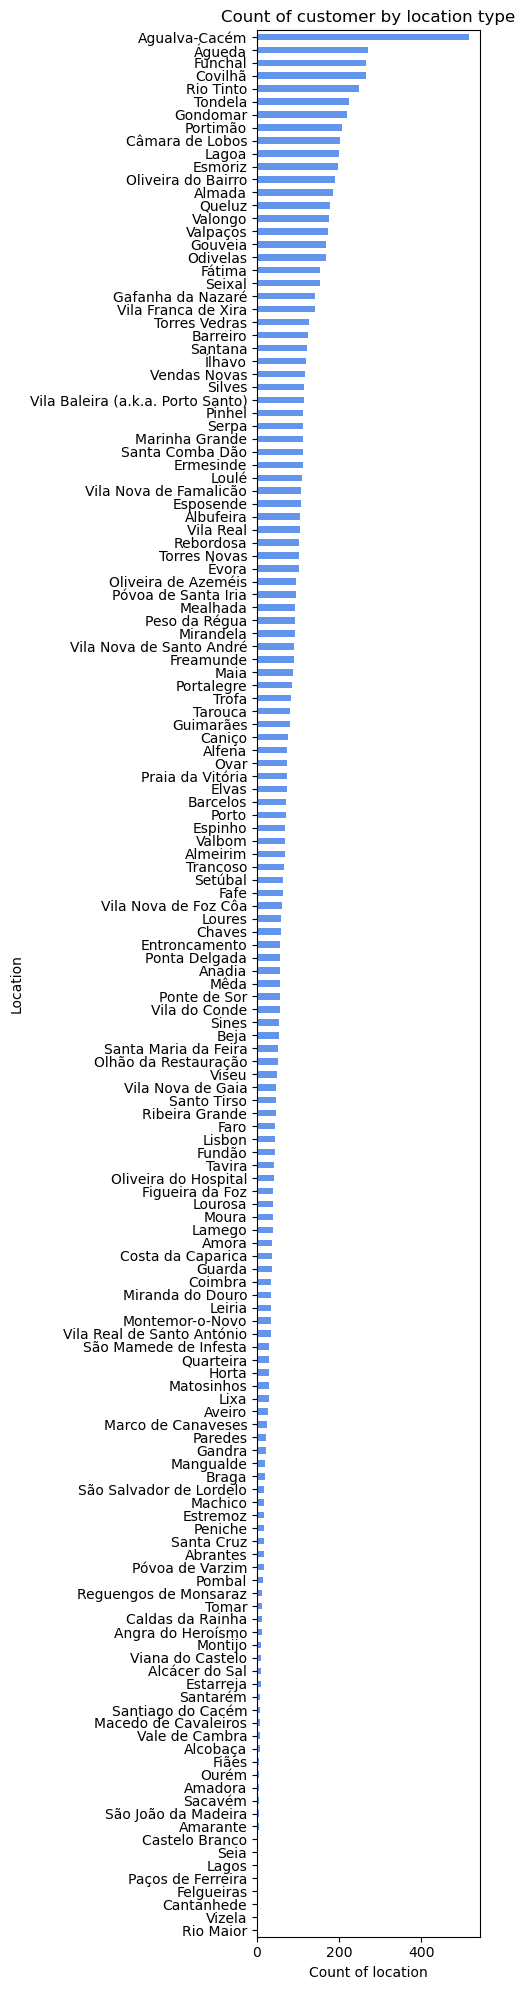

In [41]:
# One-line pandas plotting
bank_df2['location'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue',
                                                      figsize=(5, 20))
plt.xlabel('Count of location')
plt.ylabel('Location')
plt.title('Count of customer by location type')
plt.tight_layout()
plt.show()

There appears to be a wide variety of locations, with no clear majority. Therefore, we choose to add an 'unknown' value to this column.

In [42]:
#bank_df2['location'] = bank_df2['location'].fillna('unknown')
bank_df2.loc[bank_df2['location'].isnull(), 'location'] = 'unknown'

In [43]:
# Check
bank_df2['location'].isna().sum()

0

In [44]:
# Are we done?
bank_df2.isna().sum()

age                           0
job                           0
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
location                      0
dtype: int64

We still have nulls in marital and education:

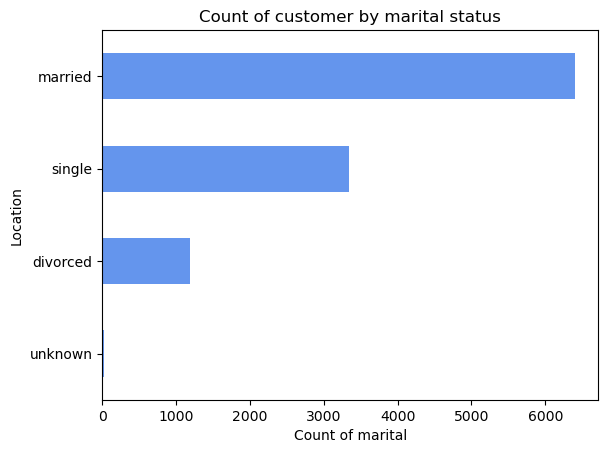

In [45]:
# One-line pandas plotting
bank_df2['marital'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of marital')
plt.ylabel('Location')
plt.title('Count of customer by marital status')
plt.show()

In [46]:
#bank_df2['marital'] = bank_df2['marital'].fillna('unknown')
bank_df2.loc[bank_df2['marital'].isnull(), 'marital'] = 'unknown'

look at the distribution again

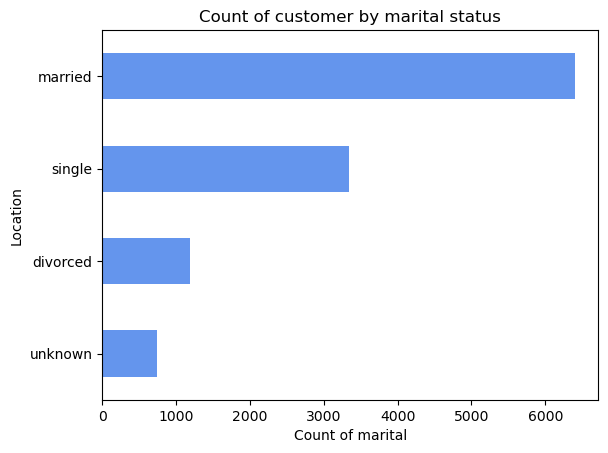

In [47]:
# One-line pandas plotting
bank_df2['marital'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of marital')
plt.ylabel('Location')
plt.title('Count of customer by marital status')
plt.show()

And finally, let's look at education:

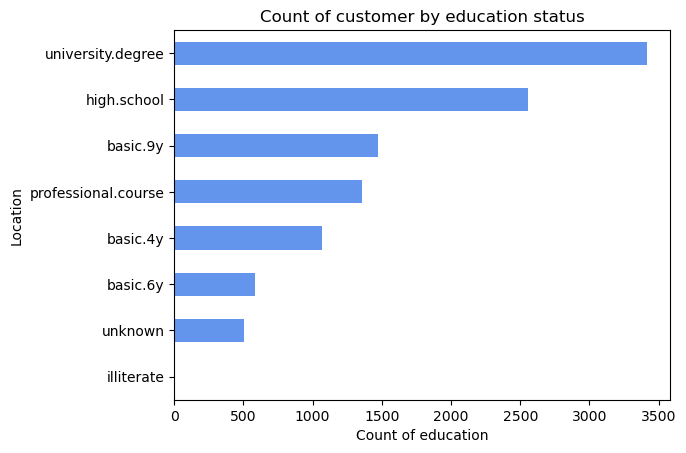

In [48]:
# One-line pandas plotting
bank_df2['education'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of education')
plt.ylabel('Location')
plt.title('Count of customer by education status')
plt.show()

We see that the illiterate category is very small. What are the actual value counts?

In [49]:
bank_df2['education'].value_counts().sort_values()

illiterate                7
unknown                 504
basic.6y                583
basic.4y               1067
professional.course    1358
basic.9y               1471
high.school            2556
university.degree      3412
Name: education, dtype: int64

At a glance it could be argued there's an unnecessary amount of granularity here and with respect to illiterate category, is it useful to have a category with just 7 people or should we fold those people into one of the other categories like unknown or basic?

Let's start by re-coding nulls as unknowns:

In [50]:
#bank_df2['education'] = bank_df2['education'].fillna('unknown')
bank_df2.loc[bank_df2['education'].isnull(), 'education'] = 'unknown'

When we get to the modeling phase, we may decide to consolidate the categories.

### Exploratory Data Analysis (EDA)
Now that we've cleaned the data, let's do some analysis to address our original question: 

>What are the characteristics of the customers who register for the term deposit account?

We will divide our data into categorical and numeric and proceed in this way.

#### Univariate Analysis - Categorical

Let's look at the variable of interest again, 'registered':

In [51]:
bank_df2.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,Mealhada
2,43.0,housemaid,unknown,unknown,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,Funchal


In [52]:
# Check the distribution of registered vs. non-registered
bank_df2['registered'].value_counts()/bank_df2.shape[0]*100.0

no     60.245094
yes    39.754906
Name: registered, dtype: float64

We see above, there is about a 60/40 split in registered and unregistered customers. Let's take a look at the customer base overall.

Split the data into categorical and numerical variables, and do some EDA for both types.

In [53]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11669 entries, 0 to 11669
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  days_since_last_contact   11669 non-null  int64  
 13  n_contacts_prev_campaign  11669 non-null  int64  
 14  prev_c

In [54]:
# Make a new dataframe of only the categorical variables
categorical_df = bank_df2.select_dtypes('object').copy()

# Check
categorical_df.head()

,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,prev_campaign_outcome,registered,location
0,student,divorced,unknown,no,no,no,cellular,may,tue,nonexistent,no,Albufeira
1,services,married,professional.course,no,no,no,cellular,may,mon,nonexistent,no,Mealhada
2,housemaid,unknown,unknown,unknown,yes,yes,cellular,jul,thu,nonexistent,no,Vila Franca de Xira
3,retired,married,basic.4y,no,no,no,cellular,oct,wed,nonexistent,no,Mirandela
4,retired,married,unknown,no,unknown,unknown,telephone,may,tue,nonexistent,no,Funchal


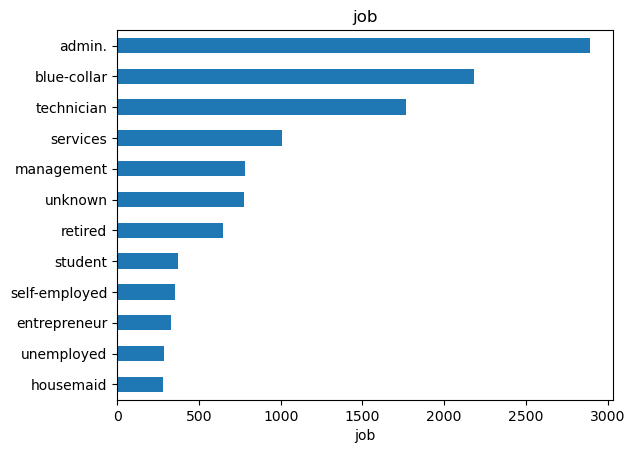

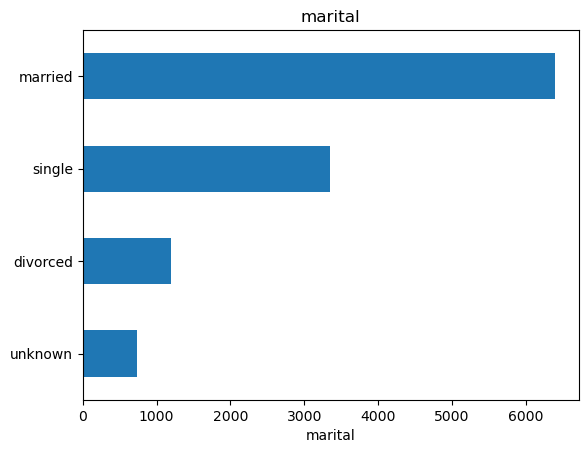

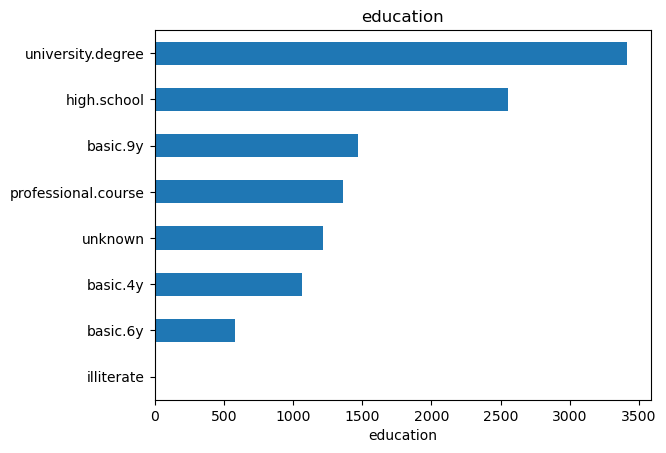

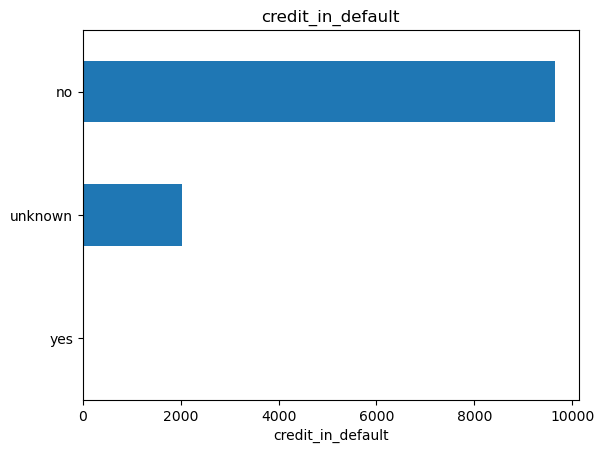

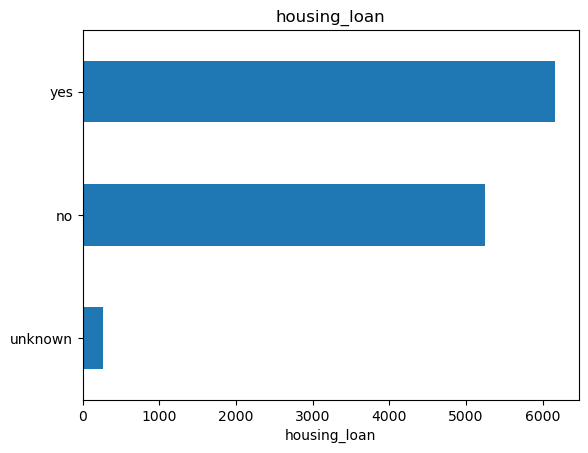

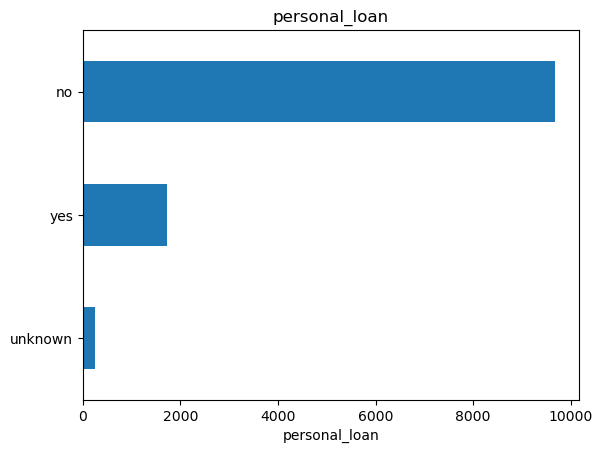

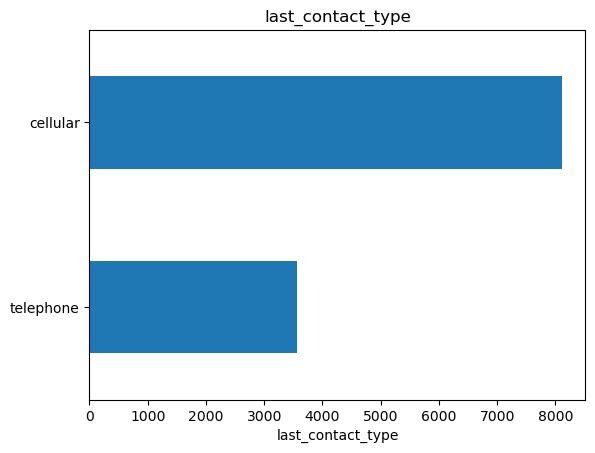

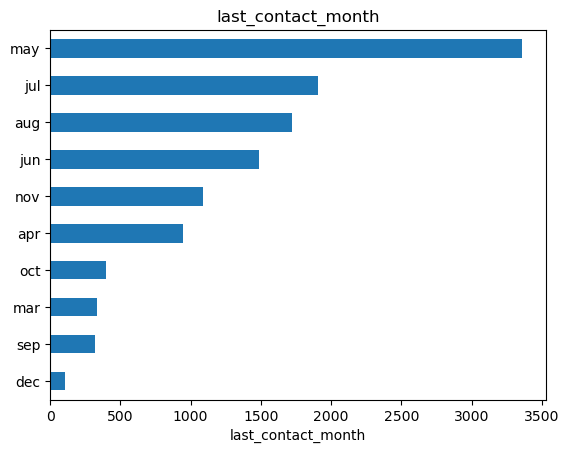

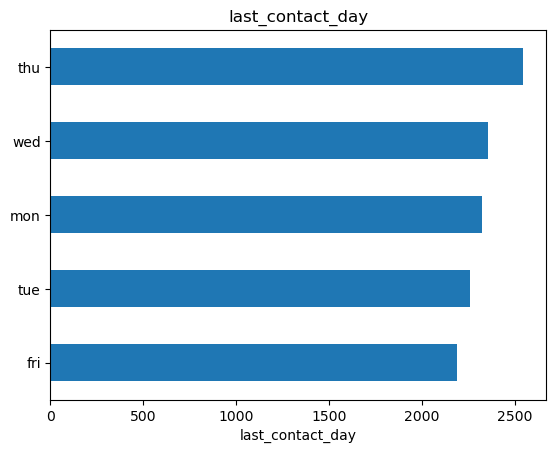

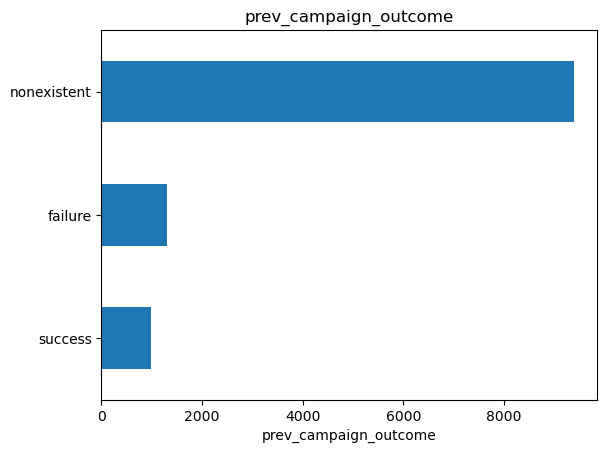

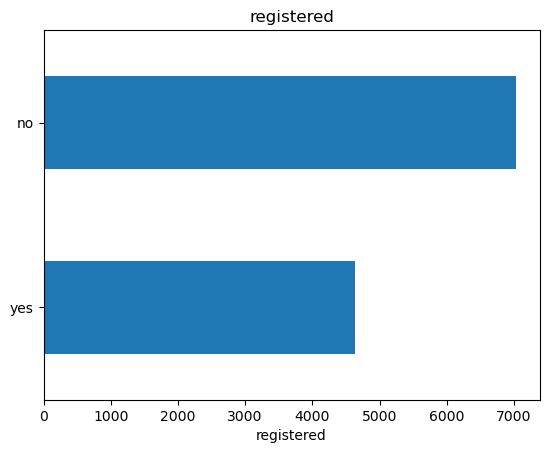

In [55]:
# Iterate over the columns
for column in categorical_df.columns[:-1]:
    
    # Visualize a summary of each
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel(column)
    plt.title(column)
    plt.show()

We leave out location in the above for loop, the output is unreadable without adjusting plot size.

We can see that:
- The majority of customers have jobs in admin, "blue collar" or "technician".
- Most of the customers are married.
- Most customers have a university or high school degree with very little other.
- The majority of customers do not have credit in default or with status unknown.
- There is almost a 50/50 split to whether or not customers have a housing loan.
- Most customers do not have a personal loan.
- The majority of customers were contacted via cellular, with most contacts happening in May, July, or August.
- ...


#### Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [56]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11669 entries, 0 to 11669
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  days_since_last_contact   11669 non-null  int64  
 13  n_contacts_prev_campaign  11669 non-null  int64  
 14  prev_c

In [57]:
# Get only the numeric columns
numeric_df = bank_df2.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
0,38.0,244.0,3,999,0
1,34.0,190.0,3,999,0
2,43.0,97.0,2,999,0
3,75.0,113.0,2,999,0
4,58.0,174.0,1,999,0


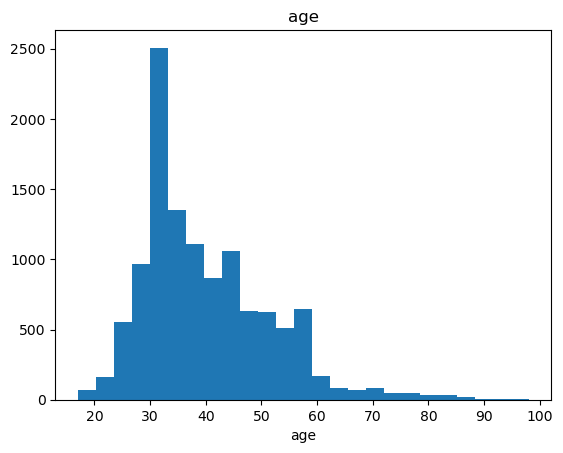

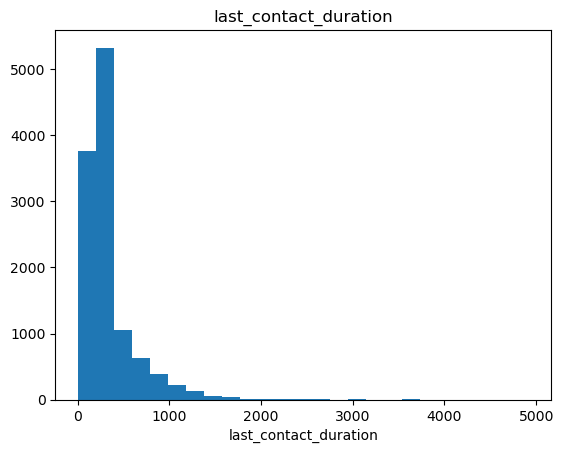

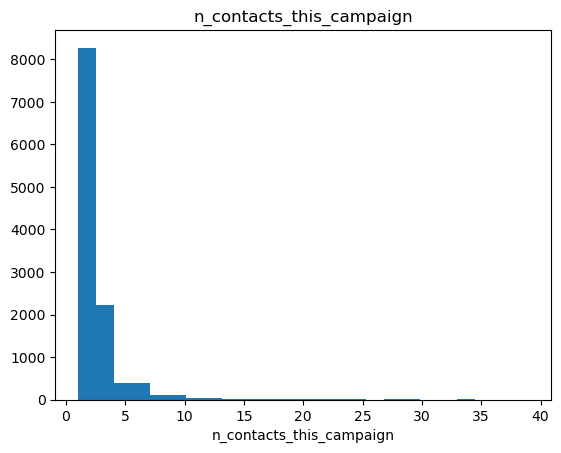

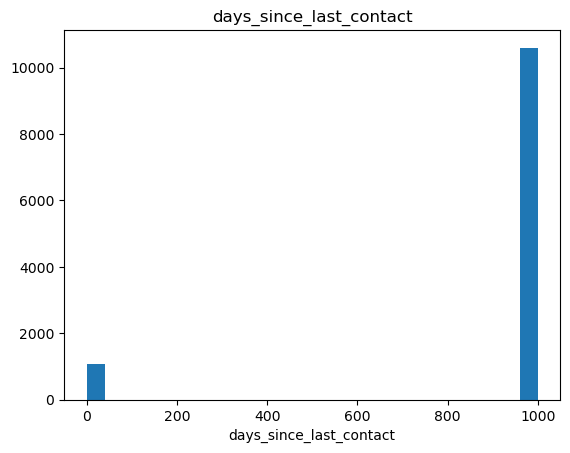

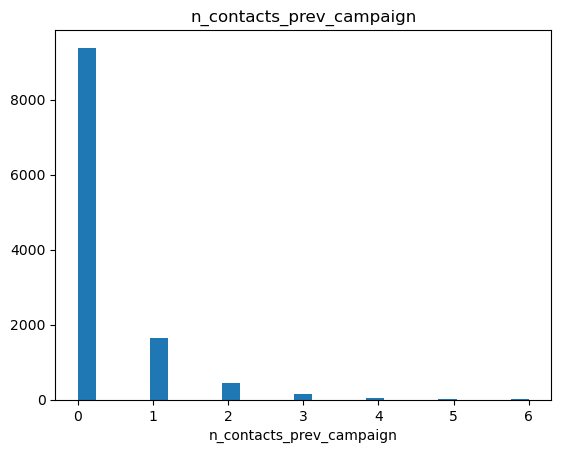

In [58]:
for column in numeric_df:
    plt.figure()
    plt.hist(bank_df2[column], bins=25)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

As we can see above, the majority of customers were not previously contacted. Also, the age distribution is right-skewed with the majority in the 30's and the last contact durations appear to follow a power law (most contact durations are very short with very few long calls).

#### Bivariate - with respect to `registered` variable.
Look at the registered variable of interest. We will repeat our analysis over the categorical variables after dividing by the registered column:

In [59]:
# Groupby
bank_df2.groupby('registered').mean(numeric_only=True)

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
registered,,,,,
no,39.511095,222.251138,2.587767,985.149360,0.132859
yes,40.393619,468.981893,2.051951,791.990946,0.492779


In that above, we can see that while there is no difference in average age between those that registered and did not, there does appear to be a large difference between the last contact duration for those who registered vs. those who did not:

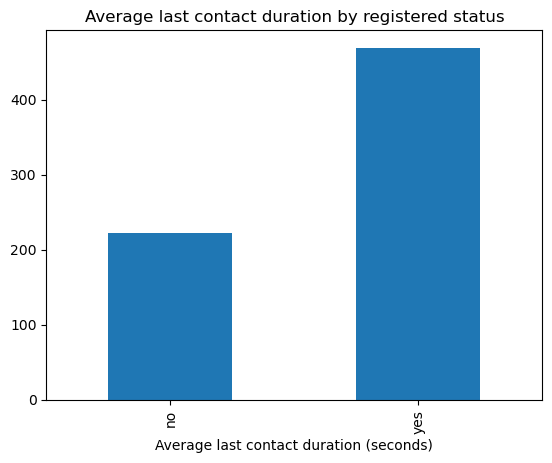

In [60]:
bank_df2.groupby('registered')['last_contact_duration'].mean().plot(kind='bar')
plt.xlabel('Average last contact duration (seconds)')
plt.title('Average last contact duration by registered status')
plt.show()

Let's look at the job type now, is there a difference in the percent who registered by profession?

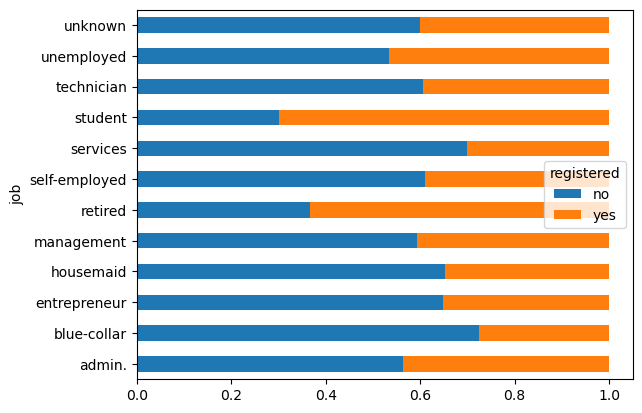

In [61]:
pct_registered_df = bank_df2.groupby(['job', 'registered'])['job'].count()/bank_df2.groupby('job')['job'].count()

pct_registered_df.unstack().plot(kind='barh', stacked=True)
plt.show()

We can take the above code and apply for all the categorical columns of interest:

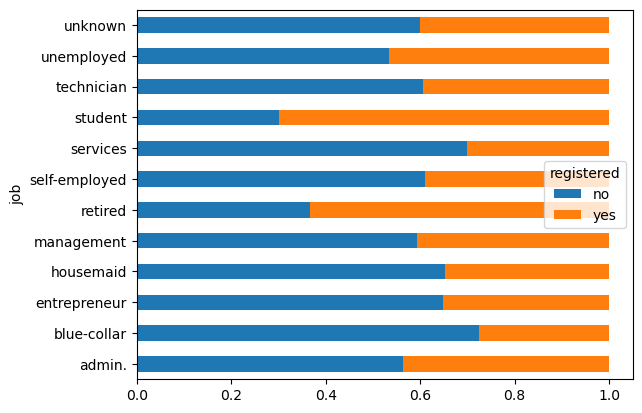

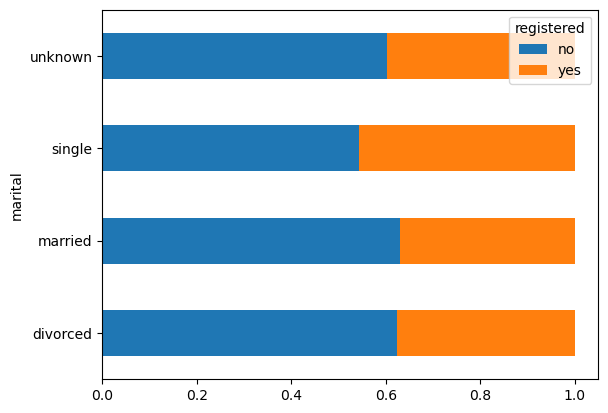

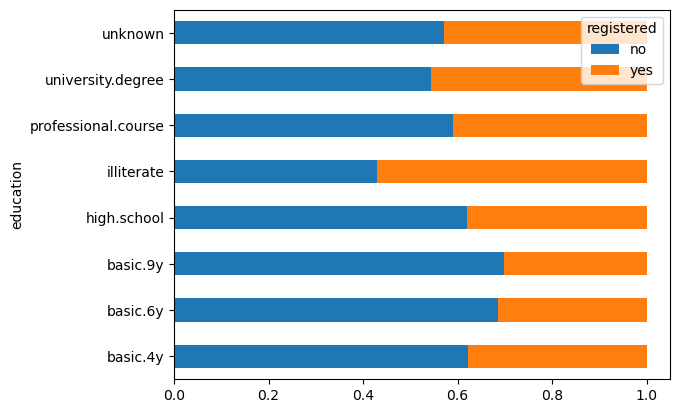

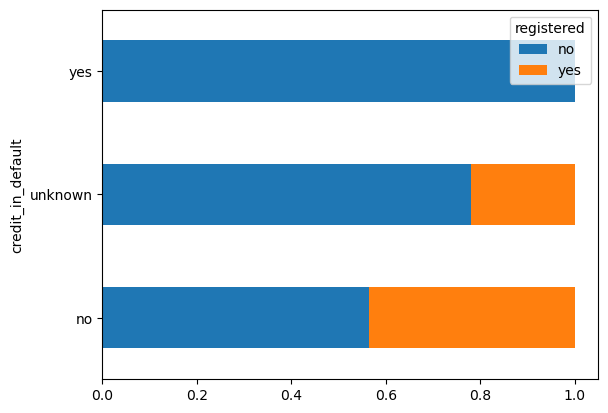

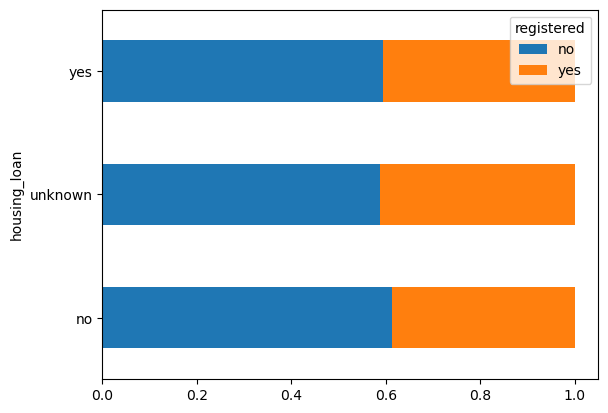

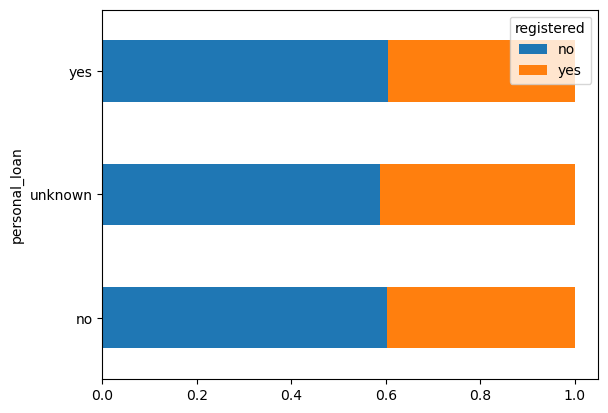

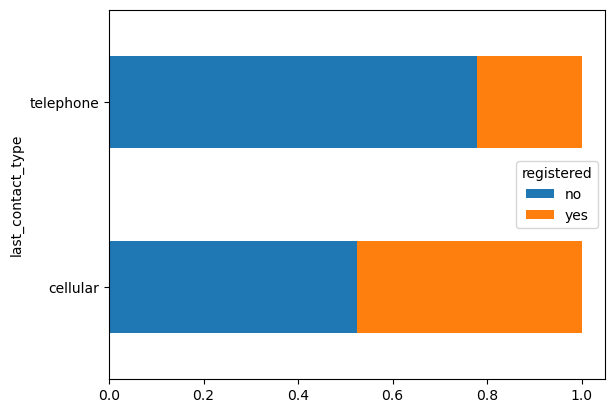

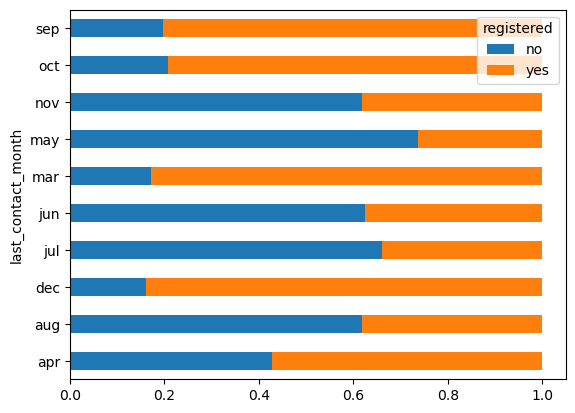

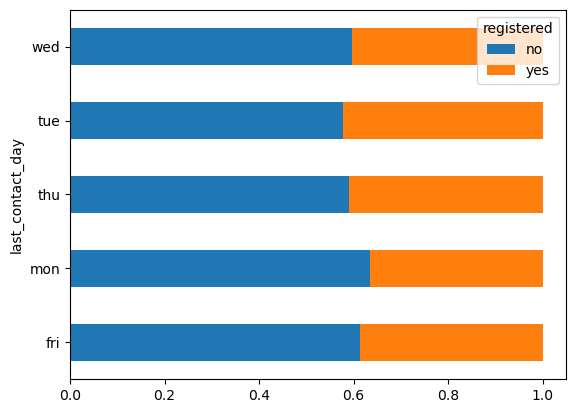

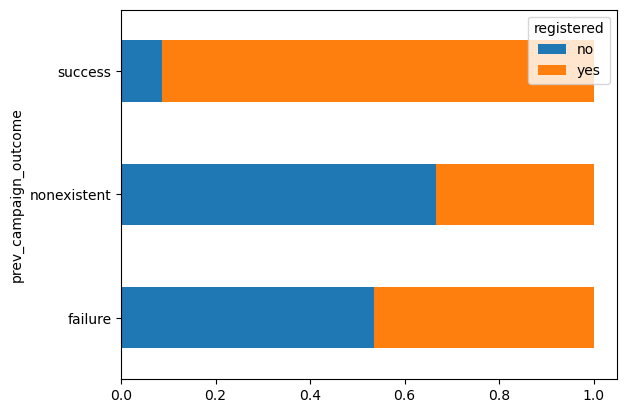

In [62]:
# Iterate over each categorical column except the last (registered)
for column in categorical_df.iloc[:, :-2]:

    pct_registered_df = categorical_df.groupby([column, 'registered'])[column].count()/bank_df2.groupby(column)[column].count()

    pct_registered_df.unstack().plot(kind='barh', stacked=True)
    plt.show()

As we can see from the above:
- Many more students and retired registered, whereas much fewer "blue collar" and "technician" did.
- It seems slightly more in the "single" status registered than those who are married or divorced.
- Those in the "illiterate" category are far more likely to have registered - we know that this category is very small so this is unlikely to be significant.
- Those with credit in default are 50/50 to have registered, whereas as those without credit in default none have registered.
- Having a housing or personal loan does not seem to effect registering; the proportions are identical regardless of status here.
- Those that were last contacted by cellular were far more likely to have registered than those contacted by "land line" (*Note*: this is likely not causal, but probably has more to do with those who tend to still have land lines vs. owning a cell phone.)
- The day of the week contacted does not appear to have an effect on registration rates.
- Those who were a successful conversion in a previous campaign were far more likely (~90%) to register for the term deposit product.

#### Bivariate Analysis - Numeric Features
Now we will repeat the process for numeric variables.

In [63]:
numeric_df

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
0,38.0,244.0,3,999,0
1,34.0,190.0,3,999,0
2,43.0,97.0,2,999,0
3,75.0,113.0,2,999,0
4,58.0,174.0,1,999,0
...,...,...,...,...,...
11665,62.0,208.0,1,1,6
11666,62.0,483.0,2,6,3
11667,37.0,281.0,1,999,0
11668,73.0,334.0,1,999,0


In [64]:
# We need the "registered" variable so we will add it back to our numeric dataframe
numeric_df['registered'] = bank_df2['registered']

# Check
numeric_df.head()

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,registered
0,38.0,244.0,3,999,0,no
1,34.0,190.0,3,999,0,no
2,43.0,97.0,2,999,0,no
3,75.0,113.0,2,999,0,no
4,58.0,174.0,1,999,0,no


There seems to be a steep drop-off at age 60 (data artifact?) Trends appear the same for both.

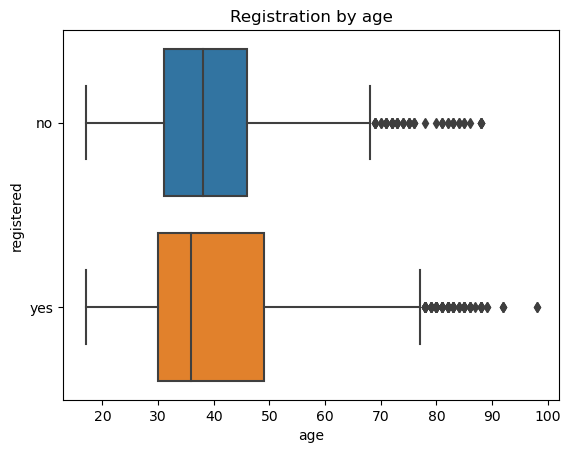

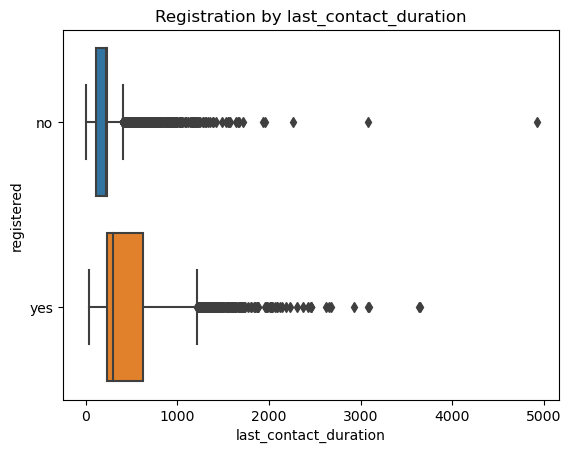

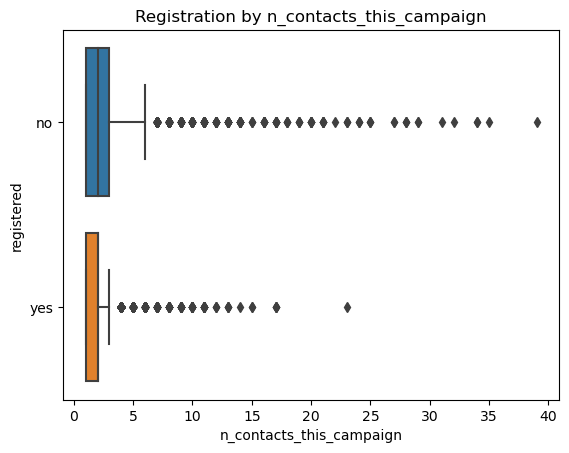

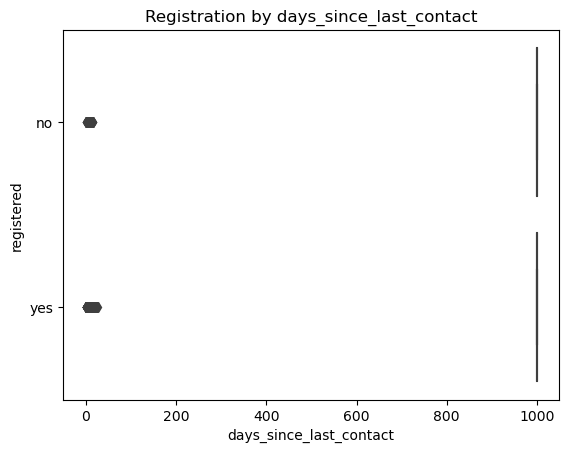

In [65]:
# Converting the registered column to string type so seaborn treats it as a category
for col in numeric_df.iloc[:, :-2]: 
    
    # Normalize the histogram by passing in 'stat=density' to account for differences in 
    # counts by class.
    sns.boxplot(x=col, y='registered', data=numeric_df)
    plt.title(f'Registration by {col}')
    plt.show()

- There does appear to be an effect of age on registration. For the most part, older people 60+ appear to be more likely to register than not. There also appears to be slightly more young people <= 25. This ties up with what we saw from the `job` column where 'Students' and 'Retirees' had much higher proportions of people registering than on average.   
- Being contacted more times in the previous campaign generally leads to more registrations, however we know that only ~1065 people were actually previously contacted. 

### Findings Summary

From our initial analysis let's summarize what we have found out so far about the differences between customers who register versus those who do not. 

- We have found out that younger and older people were more likely to register for the term deposit product. Perhaps these groups have less need for liquidity in the near term and can therefore sacrifice access to their funds for higher return. 

- In contrast to this, people who work in employment sectors that traditionally pay hourly, have contract based work, or where most people are self employed, were far less likely than average to sign up for this product. This is probably due to a less certain/consistent future income streams 

- People who had been contacted in previous campaigns were more likely to register for the product, however this was only a small portion of total customers.  

- People who were last contacted via cellular phone and whose last contact was of longer duration were more likely to register. Continue tracking phone type and call duration to re-target appropriately. 

- Contacts who were called during the months of September, October, December, March & April showed much higher conversion rates than those in other months. It's not entirely clear why, but it's worth noting that these months also had the lowest call volume. This merits further analysis.

### Saving the data

Now that we have spent the time cleaning and exploring this dataset. We are going to save it to file for now. In a short while, we will be using our cleaned dataset to carry out some modeling work to learn more about the customer characteristics which drive product registration! To be continued.... 

In [66]:
bank_df2.to_csv('data/bank-marketing-dataset-cleaned.csv', index=False) # the index column will not be saved